In [9]:
import csv

import pandas as pd

import numpy as np
%matplotlib inline
import collections

from datetime import datetime,date,time
#from wordcloud import WordCloud


import seaborn as sns
import matplotlib.pyplot as plot

from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression

from collections import defaultdict
    
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [ ]:
def Market_Profile_G(df, frequency='30Min', debug=0):
    #intialize dictionary and char 'A, B, C..'
    md = defaultdict(str)
    mi = defaultdict(int)
    char_a=64
    #make a group based on Timestamp with frequency 30min
    TGroups=df.groupby([pd.Grouper(key='DateTime', freq=frequency)])
    #iterate over each group and add to dictionary, dictonary keys are 'High' and 'Low' of each group, rounded and values are char A, B incremented for each period(freq group), default 30 min
    #since we grouped based on freq, for each group increment the char i.e +1
    for t,g in TGroups:
        char_a +=1
        #skip non alphabets
        if char_a == 91:
            char_a=97
        min_price=np.round(g.Low.min())
        max_price=np.round(g.High.max())
        if debug==1:
            print(g.Low.min(), g.High.max())
        for price in range(int(min_price), int(max_price+1)):
            md[price]+=(chr(char_a))
            #if debug==1:
            #    print(int(min_price), int(max_price),char_a)

    return sorted(md.items(), key=lambda k:k,reverse=1)


In [ ]:
def func(x):
    try:
        s=str(x.Date)+':'+str(x.Time)
        return datetime.strptime(s, "%Y%m%d:%H:%M")
    except:
        return pd.NaT

In [ ]:
data = pd.read_csv("data/KOTAKBANK-22Jan.txt")

In [ ]:
data['DateTime']=data.apply(func,axis=1)

In [ ]:
df=data[['DateTime', 'Open', 'High', 'Low', 'Close', 'Volume',]]

In [ ]:
# Reset matplotlib to non-interactive
%matplotlib inline

fig = plot.figure(figsize=(16, 8))
ax = fig.add_subplot(111)

ax.scatter(data.Time,data.Close,cmap='rainbow', linewidth=1);

In [ ]:
md=Market_Profile_G(df,frequency='30Min',debug=0)

In [ ]:
mi=defaultdict(list)
TGroups=df.groupby([pd.Grouper(key='DateTime', freq='30Min')])
#iterate over each group and add to dictionary, dictonary keys are 'High' and 'Low' of each group, rounded and values are char A, B incremented for each period(freq group), default 30 min
#since we grouped based on freq, for each group increment the char i.e +1
min_price=np.round(df.min().Low)
max_price=np.round(df.max().High)
for t,g in TGroups:
    g_min_price=np.round(g.Low.min())
    g_max_price=np.round(g.High.max())
    for price in range(int(min_price), int(max_price+1)):
        if (price > g_max_price) or (price < g_min_price):
            mi[price].append(0)
        else:
            mi[price].append(0.1)


In [ ]:
md

In [ ]:
df['Close_R']=df.apply(lambda x: round(x.Close) , axis=1)

In [ ]:
#scale volume down to 0 to 5
v=df.groupby(['Close_R'])['Volume'].sum()/1000000

In [ ]:
import seaborn as sns
%matplotlib inline

m=np.asmatrix(np.stack(mi.values()))

pdata=np.asarray(m.transpose())
start = min(mi.keys())
ind = np.arange(start,start+pdata.shape[1])

left = np.vstack((np.zeros((pdata.shape[1],), dtype=pdata.dtype),
                    np.cumsum(pdata, axis=0)[:-1]))
#colors = ('#ff3333', '#33ff33', '#3333ff', '#33ffff')
colors = sns.color_palette("Blues_d", n_colors=pdata.shape[0])

fig, ax = plot.subplots()

#ax=v.plot(kind='barh',color="gray")
#ax.invert_yaxis()
#ax1 = ax.twinx()

ax.set_xlim(0,4)
plot.xticks([], [])

ax.figure.set_size_inches(10,8)
ax.yaxis.label.set_visible(False)

for dat, col, left in zip(pdata, colors, left):
    #ax1.barh(ind, dat, color=col, left=left)
    ax.barh(ind, dat, color=col, left=left)

In [ ]:
import seaborn as sns
%matplotlib inline

m=np.asmatrix(np.stack(mi.values()))

pdata=np.asarray(m.transpose())
start = min(mi.keys())
ind = np.arange(start,start+pdata.shape[1])

left = np.vstack((np.zeros((pdata.shape[1],), dtype=pdata.dtype),
                    np.cumsum(pdata, axis=0)[:-1]))
#colors = ('#ff3333', '#33ff33', '#3333ff', '#33ffff')
colors = sns.color_palette("Blues_d", n_colors=pdata.shape[0])

#fig, ax = plot.subplots()

ax=v.plot(kind='barh',color="gray")
#ax.invert_yaxis()
ax1 = ax.twinx()

ax1.set_xlim(0,4)
plot.xticks([], [])

ax.figure.set_size_inches(15,8)
ax.yaxis.label.set_visible(False)

for dat, col, left in zip(pdata, colors, left):
    ax1.barh(ind, dat, color=col, left=left)


In [ ]:
sns.set(style="ticks")

In [ ]:
data.head()

In [ ]:
import plotly.graph_objects as go

In [ ]:
fig = go.Figure(data=[go.Candlestick(
    x=data.DateTime,
    open=data.Open, high=data.High,
    low=data.Low, close=data.Close,
    increasing_line_color= 'green', decreasing_line_color= 'red'
)])

fig.show()

In [ ]:
TGroups=df.groupby([pd.Grouper(key='DateTime', freq='30Min')])

In [ ]:
fig = go.Figure(data=[go.Candlestick(
    x=data.DateTime,
    open=data.Open, high=data.High,
    low=data.Low, close=data.Close,
    increasing_line_color= 'green', decreasing_line_color= 'red'
)])

fig.show()

In [ ]:
fig = go.Figure(data=[go.Candlestick(
    x=data.DateTime,
    open=data.Open, high=data.High,
    low=data.Low, close=data.Close,
    increasing_line_color= 'green', decreasing_line_color= 'red'
)])

fig.update_layout(xaxis_rangeslider_visible=False)
fig.show()

In [ ]:
fig = go.Figure(data=[go.Ohlc(
    x=data.DateTime,
    open=data.Open, high=data.High,
    low=data.Low, close=data.Close,
    increasing_line_color= 'green', decreasing_line_color= 'red'
)])

fig.update_layout(xaxis_rangeslider_visible=False)
fig.show()

In [ ]:
data = pd.read_csv("nse-infy20-03-2020.txt", names=['DateTime', 'Close', 'Volume',])

In [ ]:
data["DateTime"] = pd.to_datetime(data['DateTime'])

In [10]:
data = pd.read_csv("nse-infy20-03-2020.txt", names=['DateTime', 'Close', 'Volume',])
data["DateTime"] = pd.to_datetime(data['DateTime'])
md=defaultdict(list)
char_a=64
debug=1
grange = date.today().strftime("%d-%m-%Y")+' 09:15:00'
dt=pd.date_range(grange, periods=14, freq='30Min')
for i in range(0,13):
    sdf = (data['DateTime'] > dt[i]) & (data["DateTime"] < dt[i+1])
    g=data.loc[sdf]
    if g.empty:
        continue
    char_a +=1
    #skip non alphabets
    if char_a == 91:
        char_a=97
    min_price=np.round(g.Close.min())
    max_price=np.round(g.Close.max())
    for price in range(int(min_price), int(max_price+1),2):
        md[price]+=(chr(char_a))
        #print(price)
md=sorted(md.items(), key=lambda k:k,reverse=1)

In [11]:
# Iterate over items in dict and print line by line5
for key, value in md:
    print(key, value) 

603 ['H']
601 ['G', 'H']
599 ['G', 'H']
597 ['G']
596 ['F']
595 ['G']
594 ['F']
593 ['G']
592 ['F']
590 ['F']
588 ['E']
586 ['E']
584 ['E']
583 ['D']
582 ['E']
581 ['D']
580 ['B']
579 ['C', 'D']
578 ['B']
577 ['C']
576 ['B']
574 ['B']
573 ['A']
572 ['B']
571 ['A']
569 ['A']
567 ['A']
565 ['A']


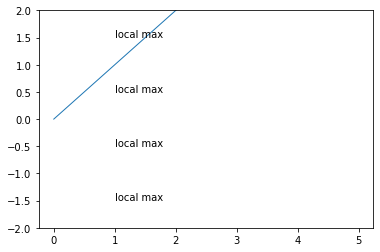

In [12]:
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

t = np.arange(0.0, 5.0, 0.01)
s = np.cos(2*np.pi*t)
line, = ax.plot(t, t, lw=1)

ax.annotate('local max', xy=(2, 1), xytext=(1, -1.5))
ax.annotate('local max', xy=(2, 1), xytext=(1, 1.5))
ax.annotate('local max', xy=(2, 1), xytext=(1, -0.5))
ax.annotate('local max', xy=(2, 1), xytext=(1, 0.5))
ax.set_ylim(-2, 2)
plt.show()